<a href="https://colab.research.google.com/github/shivangibithel/IRMiDis_Task2/blob/main/BERT_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Transformer and imports

In [ ]:
pip install transformers

In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import math
import seaborn as sn
import tensorflow as tf
import tensorflow_datasets as tfds
from bs4 import BeautifulSoup
from sklearn import metrics as sk_metrics
import nltk
import re
from sklearn.utils import shuffle

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive/')

In [ ]:
# folder = '/content/gdrive/My Drive/corona-tweet-sent'
# train_f = 'Corona_NLP_train.csv'
# test_f = 'Corona_NLP_test.csv'

# df_train = pd.read_csv(os.path.join(folder, train_f), engine='python')
# df_test = pd.read_csv(os.path.join(folder, test_f), engine='python')

# Data read and split...for some accuracy numbers

In [ ]:
# col_list = ["id", "tweet", "label"]
# our_data = pd.read_csv("irmidis-2021-task2-train.csv",usecols=col_list)
# muller_data = pd.read_csv("Muller_dataset.csv",usecols=col_list)

# y_map = {
#     'ProVax': 0, 
#     'AntiVax': 1, 
#     'Neutral': 2
# }

# our_data['Sentiment_Cat'] = our_data['label'].map(y_map)

# y_map = {
#      0: 2, 
#     -1: 1, 
#      1: 0
# }
# muller_data['Sentiment_Cat'] = muller_data['label'].map(y_map)

# frames = [our_data, muller_data]
# df = pd.concat(frames)
# df = shuffle(df)
# df.to_csv('Final_dataset.csv',index=False)

# df_train = pd.read_csv("irmidis-2021-task2-train.csv")
# df_test = pd.read_csv("irmidis-2021-task2-test.csv")
# df_train = our_data[:2233]
# df_test = our_data[2234:]

In [ ]:
# df

,id,tweet,label,Sentiment_Cat
2526,3.370560e+17,Nevada ranks well behind most of the nation fo...,1,0
562,5.608710e+17,@RepKristiNoem #GOP STOP blaming #Immigrants f...,0,2
2350,5.628020e+17,Also this is a thing and my sister refuses to ...,-1,1
2937,4.080060e+17,Why you should and shouldn't,0,2
4622,4.546540e+17,UPDATE: Elk Rapids board has voted to request ...,1,0
...,...,...,...,...
1044,1.325781e+18,I guess the stock market got this news!!!\n\n#...,Neutral,2
2063,5.104640e+17,US measles count rises to 121; most linked to ...,1,0
1981,1.336314e+18,90-year grandmother first to receive Pfizer CO...,Neutral,2
2206,1.785860e+17,Nina In New York: This Town Ain’t Big Enough F...,0,2


In [41]:
col_list = ["id", "tweet", "Sentiment_Cat"]
data = pd.read_csv("Final_dataset.csv", usecols=col_list)
from sklearn.utils import shuffle
data = shuffle(data)

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit
df = data
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_valid_index in split.split(df, df.Sentiment_Cat):
    train_set = df.iloc[train_index]
    test_valid_set = df.iloc[test_valid_index]

# split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
# for test_index, valid_index in split2.split(test_valid_set, test_valid_set.Sentiment_Cat):
#     test_set = test_valid_set.iloc[test_index]
#     valid_set = test_valid_set.iloc[valid_index]

print(train_set.shape)
print(test_valid_set.shape)
# valid_set.shape
df_train = train_set
df_test = test_valid_set

(6198, 3)
(1550, 3)


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4648 entries, 4565 to 2006
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4648 non-null   float64
 1   tweet          4648 non-null   object 
 2   Sentiment_Cat  4648 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 145.2+ KB


In [5]:
df_train.Sentiment_Cat.value_counts()

2    1597
0    1585
1    1466
Name: Sentiment_Cat, dtype: int64

In [6]:
df_test.Sentiment_Cat.value_counts()

2    1065
0    1058
1     977
Name: Sentiment_Cat, dtype: int64

In [7]:
df_train.head()

,id,tweet,Sentiment_Cat
438,1.325860e+18,Do not take the covid vaccine! It will not onl...,1
3702,5.910040e+17,My math teacher goes from talking about a sewi...,0
4319,1.331604e+18,@JustinWelby I agree. How awful to hit the poo...,0
3711,1.334598e+18,"Presidents Obama, Bush &amp; Clinton are volun...",2
5856,5.787670e+17,Expert Q&amp;A: Childhood Vaccine Safety: WebM...,2


In [8]:
df_train['tweet'].iloc[0]

'Do not take the covid vaccine! It will not only change your DNA but it will also make you unredeemable to God! https://t.co/mRazOZkfSg'

In [ ]:
# y_map = {
#     'ProVax': 0, 
#     'AntiVax': 1, 
#     'Neutral': 2
# }

# df_train['Sentiment_Cat'] = df_train['label'].map(y_map)
# df_test['Sentiment_Cat'] = df_test['label'].map(y_map)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Pre-processing

In [ ]:
# nltk.download('stopwords')
# stop_words = nltk.corpus.stopwords.words('english')

# def clean_text(data):
#     data = data.lower()
#     data = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', '', data)
#     data = re.sub(r'([^a-zA-Z\s])', '', data)
#     data = data.split()
#     temp = []
#     for i in data:
#         if i not in stop_words:
#             temp.append(i)
#     data = ' '.join(temp)
#     return data

# df_train['tweet_cleaned'] = df_train['tweet'].apply(clean_text)
# df_test['tweet_cleaned'] = df_test['tweet'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
from sklearn.feature_extraction import stop_words
stopwords = stop_words.ENGLISH_STOP_WORDS
def clean(doc): #doc is a string of text
    # doc = doc.replace("@", " ")
    # doc = doc.replace(" ", " ")
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    # doc = " ".join([token for token in doc.split() if token not in stopwords])
    #remove punctuation and numbers
    return doc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [10]:
import string
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def remove_url(data):
  url = re.compile("http[s]?\:\/\/.[a-zA-Z0-9\.\/\_?=%&#\-\+!]+", re.UNICODE)
  return re.sub(url, '', data)

In [43]:
def clean_text():
  df_train['tweet_cleaned'] = df_train['tweet'].apply(remove_url)
  df_train['tweet_cleaned'] = df_train['tweet_cleaned'].apply(clean)
  df_train['tweet_cleaned'] = df_train['tweet_cleaned'].apply(remove_emojis)
  df_test['tweet_cleaned'] = df_test['tweet'].apply(remove_url)
  df_test['tweet_cleaned'] = df_test['tweet_cleaned'].apply(clean)
  df_test['tweet_cleaned'] = df_test['tweet_cleaned'].apply(remove_emojis)

clean_text()
# df_train['tweet_cleaned'] = df_train['tweet'].apply(remove_url,clean,remove_emojis)
# df_test['tweet_cleaned'] = df_test['tweet'].apply(remove_url,clean,remove_emojis)
# for i in range(len(our_data)):
#   our_data.tweet.iloc[i] = remove_url(our_data.tweet.iloc[i])
#   our_data.tweet.iloc[i] = clean(our_data.tweet.iloc[i])
#   our_data.tweet.iloc[i] = remove_emojis(our_data.tweet.iloc[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [44]:
df_train['tweet_cleaned'].iloc[0]

'Well FUCK YOU Measles and deflated footballs       '

In [45]:
x_train, y_train = df_train['tweet_cleaned'].values, np.array(df_train['Sentiment_Cat'], dtype=np.int64)
x_test, y_test = df_test['tweet_cleaned'].values, np.array(df_test['Sentiment_Cat'], dtype=np.int64)

# BERT

In [15]:
from tokenizers import BertWordPieceTokenizer
import transformers

In [ ]:
# trying to incorporate covid-twitter-bert here
# from transformers import (
#    AutoConfig,
#    AutoTokenizer,
#    TFAutoModelForSequenceClassification,
#    AdamW,
#    glue_convert_examples_to_features
# )
# from transformers import AutoConfig, AutoModel
# import tensorflow as tf
# import tensorflow_datasets as tfds
# import json
# tokenizer = AutoTokenizer.from_pretrained("digitalepidemiologylab/covid-twitter-bert")
# model = AutoModel.from_pretrained("digitalepidemiologylab/covid-twitter-bert")

In [46]:
# First load the real tokenizer
# tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-uncased' , lower=True)
tokenizer = transformers.BertTokenizerFast.from_pretrained('bert-large-uncased', lower=True)

# Save the loaded tokenizer locally
tokenizer.save_pretrained('.')

# Reload it with the huggingface tokenizers library
fast_tokenizer = BertWordPieceTokenizer('vocab.txt', lowercase=True)
fast_tokenizer

Tokenizer(vocabulary_size=30522, model=BertWordPiece, unk_token=[UNK], sep_token=[SEP], cls_token=[CLS], pad_token=[PAD], mask_token=[MASK], clean_text=True, handle_chinese_chars=True, strip_accents=None, lowercase=True, wordpieces_prefix=##)

In [47]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=200):
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(length=maxlen)
    all_ids = []
    
    for i in range(0, len(texts), chunk_size):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)

In [48]:
max_len=60
x_train_enc = fast_encode(x_train, fast_tokenizer, maxlen=max_len)
x_test_enc = fast_encode(x_test, fast_tokenizer, maxlen=max_len)

In [49]:
NUM_CLASSES = df_train['Sentiment_Cat'].nunique()

# bert_transformer = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')
# bert_transformer = transformers.TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=NUM_CLASSES)
bert_transformer = transformers.TFBertForSequenceClassification.from_pretrained('digitalepidemiologylab/covid-twitter-bert-v2', num_labels=NUM_CLASSES)
input = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32)
sequence_output = bert_transformer(input)[0]
# cls_token = sequence_output[:, 0, :]
# output = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(cls_token)

model = tf.keras.Model(inputs=input, outputs=sequence_output)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at digitalepidemiologylab/covid-twitter-bert-v2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [50]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
tf_bert_for_sequence_classif TFSequenceClassifierOutpu 335144963 
Total params: 335,144,963
Trainable params: 335,144,963
Non-trainable params: 0
_________________________________________________________________


In [51]:
data = df_train
Neutral_data = data[data['Sentiment_Cat'] == 2]
Antivax_data = data[data['Sentiment_Cat'] == 1]
Provax_data = data[data['Sentiment_Cat'] == 0]

In [52]:
# df = Antivax_data
a=[]
for i in range(len(Antivax_data)):
  a.append(len(Antivax_data['tweet_cleaned'].iloc[i].split()))
print(max(a))
# df = Provax_data
b=[]
for i in range(len(Provax_data)):
  b.append(len(Provax_data['tweet_cleaned'].iloc[i].split()))
print(max(b))
# df = Neutral_data
c=[]
for i in range(len(Neutral_data)):
  c.append(len(Neutral_data['tweet_cleaned'].iloc[i].split()))
print(max(c))

58
59
51


In [53]:
print(len(Neutral_data), len(Antivax_data), len(Provax_data))

2130 1954 2114


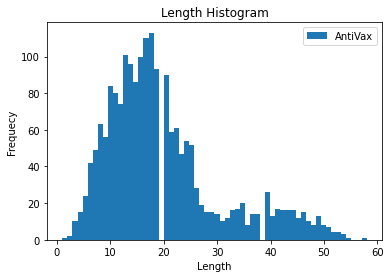

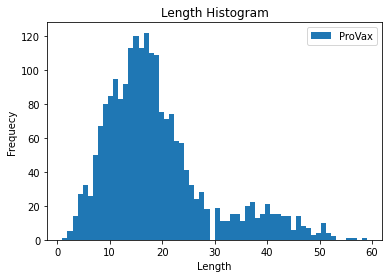

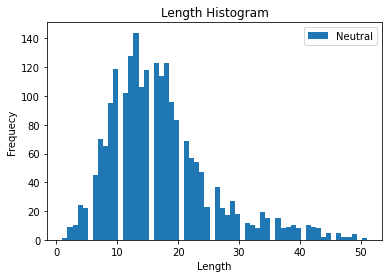

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
plt.hist(a,bins= 60, label = "AntiVax")
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequecy')
plt.title('Length Histogram')
plt.show()
plt.hist(b,bins= 60, label = "ProVax")
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequecy')
plt.title('Length Histogram')
plt.show()
plt.hist(c, bins= 60, label = "Neutral")
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequecy')
plt.title('Length Histogram')
plt.show()

In [56]:
# call backs
early_stop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

history = model.fit(
    x_train_enc,
    y_train,
    batch_size=16,
    validation_data=(x_test_enc, y_test),
    epochs=50,
    callbacks=[early_stop_callback])

Epoch 1/50
388/388 [==============================] - 595s 1s/step - loss: 1.1111 - accuracy: 0.3411 - val_loss: 1.0912 - val_accuracy: 0.3613
Epoch 2/50
388/388 [==============================] - 550s 1s/step - loss: 1.1155 - accuracy: 0.3312 - val_loss: 1.1007 - val_accuracy: 0.3413
Epoch 3/50
388/388 [==============================] - 550s 1s/step - loss: 1.1127 - accuracy: 0.3372 - val_loss: 1.1055 - val_accuracy: 0.3413
Epoch 4/50
388/388 [==============================] - 551s 1s/step - loss: 1.1094 - accuracy: 0.3404 - val_loss: 1.0987 - val_accuracy: 0.3413


In [ ]:
# call backs
early_stop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

history = model.fit(
    x_train_enc,
    y_train,
    batch_size=16,
    validation_data=(x_test_enc, y_test),
    epochs=50,
    callbacks=[early_stop_callback])

Epoch 1/50
140/140 [==============================] - 153s 899ms/step - loss: 0.9717 - accuracy: 0.5016 - val_loss: 0.7530 - val_accuracy: 0.7097
Epoch 2/50
140/140 [==============================] - 122s 875ms/step - loss: 0.7204 - accuracy: 0.7197 - val_loss: 0.5340 - val_accuracy: 0.8405
Epoch 3/50
140/140 [==============================] - 122s 875ms/step - loss: 0.4787 - accuracy: 0.8486 - val_loss: 0.4793 - val_accuracy: 0.8405
Epoch 4/50
140/140 [==============================] - 122s 873ms/step - loss: 0.3327 - accuracy: 0.8948 - val_loss: 0.4384 - val_accuracy: 0.8405
Epoch 5/50
140/140 [==============================] - 122s 874ms/step - loss: 0.2181 - accuracy: 0.9346 - val_loss: 0.3756 - val_accuracy: 0.8781
Epoch 6/50
140/140 [==============================] - 122s 874ms/step - loss: 0.1476 - accuracy: 0.9579 - val_loss: 0.4153 - val_accuracy: 0.8620
Epoch 7/50
140/140 [==============================] - 122s 874ms/step - loss: 0.0963 - accuracy: 0.9745 - val_loss: 0.3745 -

# Prediction 

In [57]:
ypred = model.predict(x_test_enc)
# df_test['ypred'] = ypred
# df_test['ypred_cat'] = np.where(df_test['ypred']>=0.5, 1, 0)
df_test['ypred_cat'] = np.argmax(ypred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [58]:
print(np.argmax(ypred, axis=1))

[2 2 2 ... 2 2 2]


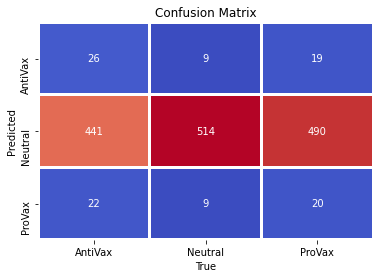

In [59]:
y_map_inv = {
    0: 'ProVax',
    1: 'AntiVax',
    2: 'Neutral'
}

# y_map = {
#     'ProVax': 0, 
#     'AntiVax': 1, 
#     'Neutral': 2
# }

sns.heatmap(
    pd.crosstab(df_test['ypred_cat'].map(y_map_inv), df_test['Sentiment_Cat'].map(y_map_inv)),
    annot=True,
    fmt='0.0f',
    cbar=False,
    linewidth=2,
    cmap='coolwarm'     
)

plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix');

In [60]:
y_test = df_test['Sentiment_Cat'].map(y_map_inv)
y_pred = df_test['ypred_cat'].map(y_map_inv)
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))


Confusion Matrix

[[ 26 441  22]
 [  9 514   9]
 [ 19 490  20]]

Accuracy: 0.36

Micro Precision: 0.36
Micro Recall: 0.36
Micro F1-score: 0.36

Macro Precision: 0.41
Macro Recall: 0.35
Macro F1-score: 0.23

Weighted Precision: 0.41
Weighted Recall: 0.36
Weighted F1-score: 0.23

Classification Report

              precision    recall  f1-score   support

     Class 1       0.48      0.05      0.10       489
     Class 2       0.36      0.97      0.52       532
     Class 3       0.39      0.04      0.07       529

    accuracy                           0.36      1550
   macro avg       0.41      0.35      0.23      1550
weighted avg       0.41      0.36      0.23      1550



In [ ]:
y_test = df_test['Sentiment_Cat'].map(y_map_inv)
y_pred = df_test['ypred_cat'].map(y_map_inv)
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))


Confusion Matrix

[[130   9  12]
 [ 12 167  14]
 [  8  11 195]]

Accuracy: 0.88

Micro Precision: 0.88
Micro Recall: 0.88
Micro F1-score: 0.88

Macro Precision: 0.88
Macro Recall: 0.88
Macro F1-score: 0.88

Weighted Precision: 0.88
Weighted Recall: 0.88
Weighted F1-score: 0.88

Classification Report

              precision    recall  f1-score   support

     Class 1       0.87      0.86      0.86       151
     Class 2       0.89      0.87      0.88       193
     Class 3       0.88      0.91      0.90       214

    accuracy                           0.88       558
   macro avg       0.88      0.88      0.88       558
weighted avg       0.88      0.88      0.88       558

